In [2]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [3]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [8]:
app_train.select_dtypes(['float']).columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI'

In [10]:
app_train[app_train.columns[0:20]].select_dtypes(['float']).head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION
0,202500.0,406597.5,24700.5,351000.0,0.018801,-3648.0
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1186.0
2,67500.0,135000.0,6750.0,135000.0,0.010032,-4260.0
3,135000.0,312682.5,29686.5,297000.0,0.008019,-9833.0
4,121500.0,513000.0,21865.5,513000.0,0.028663,-4311.0


In [13]:
#選取需要的欄位
new_app_train = pd.concat([app_train['TARGET'],
                            app_train['AMT_INCOME_TOTAL'],
                            app_train['AMT_CREDIT'],
                            app_train['AMT_ANNUITY'],
                            app_train['AMT_GOODS_PRICE'],
                            app_train['REGION_POPULATION_RELATIVE'],
                            app_train['DAYS_REGISTRATION']],axis=1)
new_app_train['AMT_INCOME_TOTAL'].head()


0    202500.0
1    270000.0
2     67500.0
3    135000.0
4    121500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [14]:
#計算各欄位之平均數與標準差
for column in new_app_train.columns:
    print("mean of "+str(column)+" : ",new_app_train[column].mean())

for column in new_app_train.columns:
    print("standard deviation of  "+str(column)+" : ",new_app_train[column].std())


mean of TARGET :  0.08072881945686496
mean of AMT_INCOME_TOTAL :  168797.9192969845
mean of AMT_CREDIT :  599025.9997057016
mean of AMT_ANNUITY :  27108.573909183444
mean of AMT_GOODS_PRICE :  538396.2074288895
mean of REGION_POPULATION_RELATIVE :  0.02086811205778947
mean of DAYS_REGISTRATION :  -4986.120327538419
standard deviation of  TARGET :  0.272418645647685
standard deviation of  AMT_INCOME_TOTAL :  237123.14627883647
standard deviation of  AMT_CREDIT :  402490.776995946
standard deviation of  AMT_ANNUITY :  14493.737315117392
standard deviation of  AMT_GOODS_PRICE :  369446.4605400129
standard deviation of  REGION_POPULATION_RELATIVE :  0.013831280122699869
standard deviation of  DAYS_REGISTRATION :  3522.88632096305


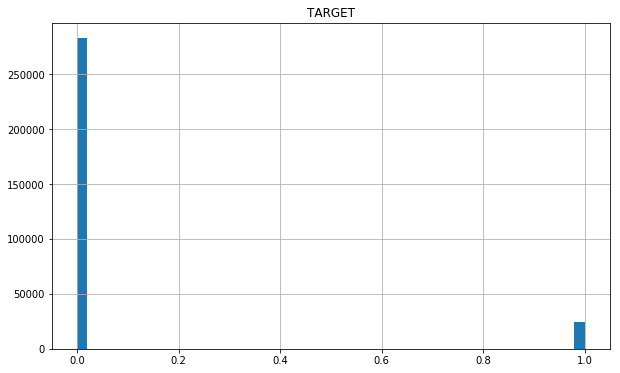

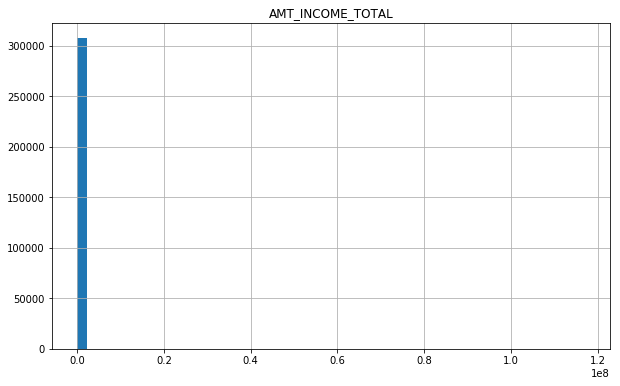

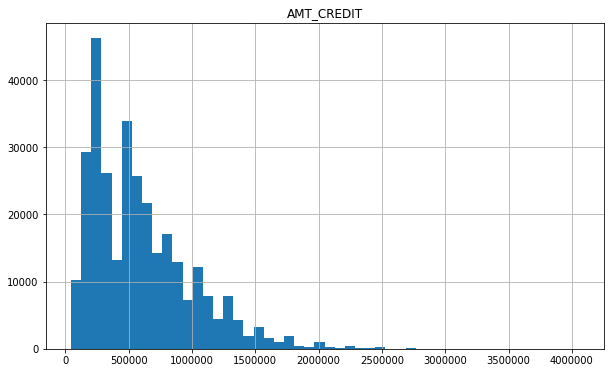

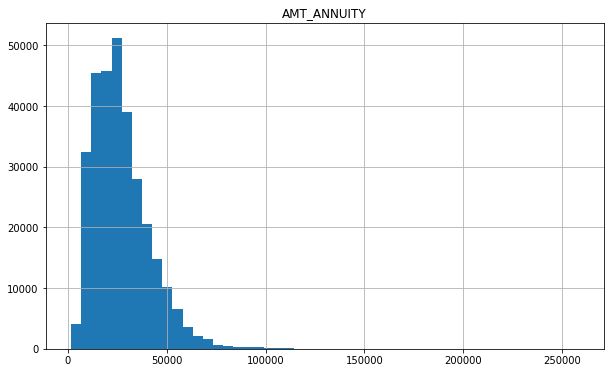

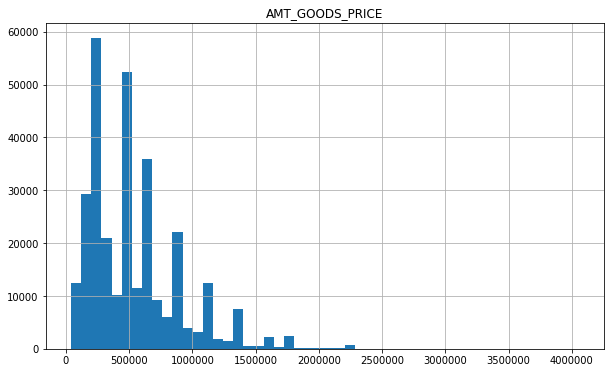

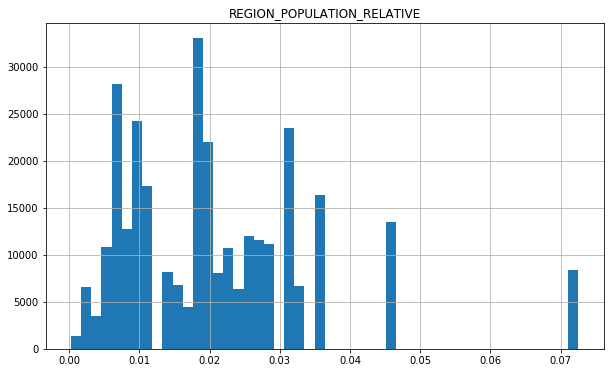

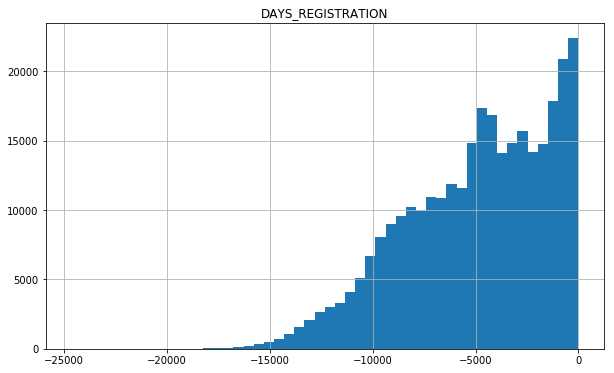

In [28]:
#直方圖
for column in new_app_train.columns:
    plt.figure(figsize=(10,6))
    new_app_train[column].hist(bins=50)
    plt.title(column)
    plt.show()